In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:95% !important; }</style>")

# Steepest descent and Newton's method

## Let us define the same function as on the previous lesson for testing

In [2]:
def f_simple(x):
    return (x[0] - 10.0)**2 + (x[1] + 5.0)**2+x[0]**2

## Automatic differentiation in Python

Import automatic differentiation package for Python

In [3]:
#Needs to be installed typing

!pip install ad


  Created wheel for ad: filename=ad-1.3.2-cp36-none-any.whl size=24144 sha256=9f99e7563575abe1955cff6c167c8d067db3e8bade5c4b01c2567c54b73d4504
  Stored in directory: /root/.cache/pip/wheels/e0/b7/73/3a561be3a31777f33fc78fff1794d10d1012dfeb8ef54c21e8
Successfully built ad


In [4]:
import ad

In [5]:
help(ad)

Help on package ad:

NAME
    ad - Created on Thu Apr 11 12:52:09 2013

DESCRIPTION
    @author: tisimst

PACKAGE CONTENTS
    admath (package)
    linalg (package)

FUNCTIONS
    adnumber(x, tag=None)
        Constructor of automatic differentiation (AD) variables, or numbers that
        keep track of the derivatives of subsequent calculations.
        
        Parameters
        ----------
        x : scalar or array-like
            The nominal value(s) of the variable(s). Any numeric type or array is
            supported. If ``x`` is another AD object, a fresh copy is returned that
            contains all the derivatives of ``x``, but is not related to ``x`` in 
            any way.
        
        Optional
        --------
        tag : str
            A string identifier. If an array of values for ``x`` is input, the tag 
            applies to all the new AD objects.
            
        Returns
        -------
        x_ad : an AD object
            
        Examples
      

You can ask for gradient and hessian using the <pre>ad.gh</pre> function. Let us do that for the function <it>f</it>  that we defined.

In [6]:
grad_f, hess_f = ad.gh(f_simple)

In [7]:
print("At the point (1,2) gradient is ", grad_f([1,2]), " and hessian is ",hess_f([1,2]))

At the point (1,2) gradient is  [-16.0, 14.0]  and hessian is  [[4.0, 0.0], [0.0, 2.0]]


### Let us visualize the gradient

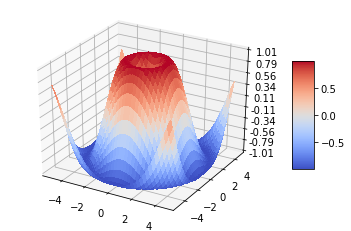

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from pylab import meshgrid
def visualize_gradient(f,point,x_lim,y_lim):
    grad_point = np.array(ad.gh(f)[0](point))
    grad_point = grad_point/np.linalg.norm(grad_point)
    X,Y,Z = point[0],point[1],f(point)
    U,V,W = grad_point[0],grad_point[1],0
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(x_lim[0],x_lim[1],0.1)
    y = np.arange(y_lim[0],y_lim[1],0.1)
    X2,Y2 = meshgrid(x, y) # grid of point
    Z2 = np.array([f([x,y]) for (x,y) in zip (X2,Y2)]) # evaluation of the function on the grid
    # Plot the surface
    surf = ax.plot_surface(X2, Y2, Z2,alpha=0.5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax.quiver(X,Y,Z,U,V,W,color='red',linewidth=1.5)
    return plt
    

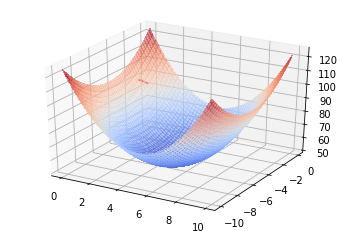

In [10]:
visualize_gradient(f_simple,[1,-2],[0,10],[-10,0]).show()

With the lambda function we can easily visualize gradients of various functions

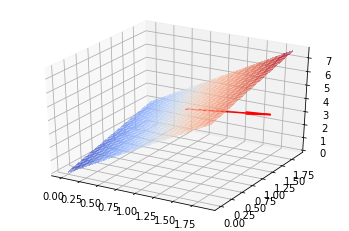

In [11]:
import math
visualize_gradient(lambda x:3*x[0]+x[1],[1,1],[0,2],[0,2]).show()

## Base algorithm for the steepest descent and Newton's algorithms
**Input:** function $f$ to be optimized, starting point $x_0$, step length rule $alpha$, stopping rule $stop$  
**Output:** A solution $x^*$ that is close to a locally optimal solution
```
set f_old as a big number and f_new as f(x0)
while a stopping criterion has not been met:
    f_old = f_new
    determine search direction d_h according to the method
    determine the step length alpha
    set x = x + alpha *d_h
    f_new = f(x)
return x
```

The way to determine search direction distinguishes steepest descent algorithm and the Newton algorithm. Different stopping rules and step sizes can be mixed and matched with both algorithms.

## Steepest Descent algorithm for unconstrained optimization

In the steepest descent algorithm, the search direction is determined by the negative of the gradient $-\nabla f(x)$.

### Code in Python

Let us use a simple stopping rule, where we stop when the change is not bigger than precision and we have a fixed step size.

In [12]:
import numpy as np
import ad
def steepest_descent(f,start,step,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    while abs(f_old-f_new)>precision:
        f_old = f_new
        d = -np.array(ad.gh(f)[0](x))
        x = x+d*step
        f_new = f(x)
        steps.append(list(x))
    return x,f_new,steps

### Solve the problem using the Python function

In [13]:
start = [2.0,-10.0]
(x_value,f_value,steps) = steepest_descent(f_simple,start,0.2,0.0001)
print ("Optimal solution is ",x_value)

Optimal solution is  [ 5.         -5.00653035]


Plot the steps of solving

In [14]:
import matplotlib.pyplot as plt

def plot_2d_steps(steps,start):
    myvec = np.array([start]+steps).transpose()
    plt.plot(myvec[0,],myvec[1,],'ro')
    for label,x,y in zip([str(i) for i in range(len(steps)+1)],myvec[0,],myvec[1,]):
        plt.annotate(label,xy = (x, y))
    return plt

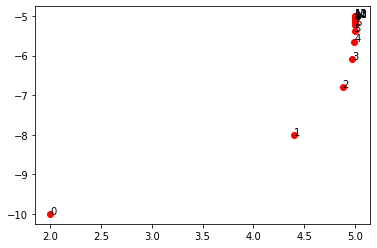

In [15]:
plot_2d_steps(steps,start).show()

## Newton's method

Based on setting the research direction as $-[Hf(x)]^{-1}\nabla f(x)$.

In one-dimensional case, it is easy to see that since
$$f(x+\Delta x)\approx f(x)+f'(x)\Delta x+\frac12f''(x)\Delta x^2$$
with the Taylor series.

We want to find $x$ such that $f(x)$ is at minimum and, thus, we seek to solve the equation that sets the derivative of this expression with respect to $\Delta x$ equal to zero:

$$ 0 = \frac{d}{d\Delta x} \left(f(x_n)+f'(x_n)\Delta x+\frac 1 2 f''(x_n) \Delta x^2\right) = f'(x_n)+f'' (x_n) \Delta x.$$

The solution of the above equation is $\Delta x=-f'(x)/f''(x)$. Thus, the best approximation of $x$ as the minimum is $x-f''(x)^{-1}f'(x)$.


In [16]:
def newton(f,start,step,precision):
    f_old = float('Inf')
    x = np.array(start)
    steps = []
    f_new = f(x)
    while abs(f_old-f_new)>precision:
        f_old = f_new
        H_inv = np.linalg.inv(np.matrix(ad.gh(f)[1](x)))
        d = (-H_inv*(np.matrix(ad.gh(f)[0](x)).transpose())).transpose()
        #Change the type from np.matrix to np.array so that we can use it in our function
        x = np.array(x+d*step)[0]
        f_new = f(x)
        steps.append(list(x))
    return x,f_new,steps

In [17]:
start = [2.0,-10.0]
(x_value,f_value,steps) = newton(f_simple,start,0.5,0.01)
print ("Optimal solution is ",x_value)

Optimal solution is  [ 4.9765625 -5.0390625]


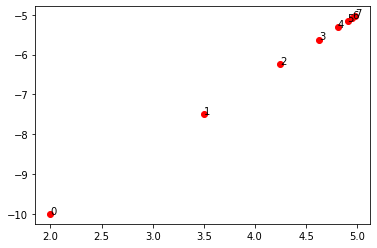

In [18]:
plot_2d_steps(steps,start).show()